In [12]:
import pandas as pd
import re
xls_file = pd.ExcelFile('/Users/nicholasthomas/desktop/actors_awards.xls')
xls_file.sheet_names
df = xls_file.parse('Sheet1')
df['Actor'] = df['Actor'].map(lambda x: re.sub(r'\W+', '', x))
df_awards = df.sort_values(['Actor']).reset_index()
df_awards_cat = pd.get_dummies(df_awards['Category'])
df_new_awards = pd.concat([df_awards, df_awards_cat], axis=1)

df_awards_winners = df_new_awards[df_new_awards.Winner.str.contains("nominee") == False]
df_awards_nominees = df_new_awards[df_new_awards.Winner.str.contains("won") == False]
df_awards_winners
df_awards_nominees
summed = df_awards_winners.groupby(['Actor']).sum().reset_index()
df_awards_winners_less = summed.drop(['index','Year'], axis=1)

df_awards_winners_less['Golden Globe wins'] = (df_awards_winners_less['Golden Globe Best Actor Drama'] 
                                               + df_awards_winners_less['Golden Globe Best Actor Musical or Comedy']
                                               + df_awards_winners_less['Golden Globe Best Supporting Actor']
                                              + df_awards_winners_less['Golden Globe Best Supporting Actress']
                                              + df_awards_winners_less['Golden Globes Best Actress Comedy or Musical']
                                              + df_awards_winners_less['Golden Globes Best Actress Drama'])

df_awards_winners_less['Oscar wins'] = (df_awards_winners_less['Oscar Best Actor'] 
                                               + df_awards_winners_less['Oscar Best Actress']
                                               + df_awards_winners_less['Oscar Best Supporting Actor']
                                              + df_awards_winners_less['Oscar Best Supporting Actress'])

df_awards_winners_less['Total Award wins'] = (df_awards_winners_less['Oscar wins'] 
                                               + df_awards_winners_less['Golden Globe wins'])

added = df_awards_nominees.groupby(['Actor']).sum().reset_index()

df_awards_nominees_less =  added.drop(['index','Year'], axis=1)

df_awards_nominees_less['Golden Globe nominations'] = (df_awards_nominees_less['Golden Globe Best Actor Drama'] 
                                               + df_awards_nominees_less['Golden Globe Best Actor Musical or Comedy']
                                               + df_awards_nominees_less['Golden Globe Best Supporting Actor']
                                              + df_awards_nominees_less['Golden Globe Best Supporting Actress']
                                              + df_awards_nominees_less['Golden Globes Best Actress Comedy or Musical']
                                              + df_awards_nominees_less['Golden Globes Best Actress Drama'])



df_awards_nominees_less['Oscar nominations'] = (df_awards_nominees_less['Oscar Best Actor'] 
                                               + df_awards_nominees_less['Oscar Best Actress']
                                               + df_awards_nominees_less['Oscar Best Supporting Actor']
                                              + df_awards_nominees_less['Oscar Best Supporting Actress'])



df_awards_nominees_less['Total Award nominations'] = (df_awards_nominees_less['Oscar nominations'] 
                                               + df_awards_nominees_less['Golden Globe nominations'])
df_awards_nominees_less.columns = ['Actor',
                                   'Golden Globe Best Actor Drama nomination',
                                   'Golden Globe Best Actor Musical or Comedy nomination',
                                   'Golden Globe Best Supporting Actor nomination',
                                   'Golden Globe Best Supporting Actress nomination',
                                   'Golden Globes Best Actress Comedy or Musical nomination',
                                   'Golden Globes Best Actress Drama nomination',
                                   'Oscar Best Actor nomination',
                                   'Oscar Best Actress nomination',
                                   'Oscar Best Supporting Actor nomination',
                                   'Oscar Best Supporting Actress nomination',
                                   'Oscar nominations',
                                   'Golden Globe nominations',
                                   'Total Award nominations']
df_awards_winners_less.columns = ['Actor',
                                   'Golden Globe Best Actor Drama win',
                                   'Golden Globe Best Actor Musical or Comedy win',
                                   'Golden Globe Best Supporting Actor win',
                                   'Golden Globe Best Supporting Actress win',
                                   'Golden Globes Best Actress Comedy or Musical win',
                                   'Golden Globes Best Actress Drama win',
                                   'Oscar Best Actor win',
                                   'Oscar Best Actress win',
                                   'Oscar Best Supporting Actor win',
                                   'Oscar Best Supporting Actress win',
                                   'Oscar wins',
                                   'Golden Globe wins',
                                   'Total Award wins']
df_awards_nominees_less
df_awards_winners_less

final_df = pd.merge(df_awards_nominees_less, df_awards_winners_less, on='Actor', how='outer')
actor_awards_final = final_df.fillna(0)
actor_awards_final


,Actor,Golden Globe Best Actor Drama nomination,Golden Globe Best Actor Musical or Comedy nomination,Golden Globe Best Supporting Actor nomination,Golden Globe Best Supporting Actress nomination,Golden Globes Best Actress Comedy or Musical nomination,Golden Globes Best Actress Drama nomination,Oscar Best Actor nomination,Oscar Best Actress nomination,Oscar Best Supporting Actor nomination,...,Golden Globe Best Supporting Actress win,Golden Globes Best Actress Comedy or Musical win,Golden Globes Best Actress Drama win,Oscar Best Actor win,Oscar Best Actress win,Oscar Best Supporting Actor win,Oscar Best Supporting Actress win,Oscar wins,Golden Globe wins,Total Award wins
0,AaronEckhart,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AbbeyLincoln,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AbigailBreslin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AdamSandler,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AdolphCaesar,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,AdolpheMenjou,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,AdrianaBarraza,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,AdrienBrody,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
8,AgnesMoorehead,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
9,AileenQuinn,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import re
import dateutil.parser
import os

      
%matplotlib inline

#url = 'http://www.boxofficemojo.com/movies/?id=starwars7.htm'
#url2 = 'http://www.boxofficemojo.com/alltime/domestic.htm?page=1&p=.htm'
#response = requests.get(url)
#soup = BeautifulSoup(open("/Users/nicholasthomas/desktop/coding.local/Luther_htmls/frozen2013.html"))

def get_movie_value(soup, field_name):
    obj = soup.find(text=re.compile(field_name))
    if not obj: 
        return None
    next_sibling = obj.findNextSibling()
    if next_sibling:
        return next_sibling.text 
    else:
        return None
    
def get_actors(soup, field_name):

    actors = soup.find(text = re.compile(field_name))
    if not actors:
        return 'Empty'
    actors_tags = actors.findParent().findParent().findParent().findNextSibling().findAll(re.compile("a"))
    actornames = []
    for tag in actors_tags:
        actornames.append(tag.text)
    return actornames

def to_date(datestring):
    try:
        date = dateutil.parser.parse(datestring)
        return date
    except:
        return None

def money_to_int(moneystring):
    try:
        moneystring = moneystring.replace('$', '').replace(',', '')
        return int(moneystring)
    except:
        return None
        

def runtime_to_minutes(runtimestring):
    
    try:
        runtime = runtimestring.split()
        minutes = int(runtime[0])*60 + int(runtime[2])
        return minutes
    except:
        return None


def data_extract(html):
    soup = BeautifulSoup(html)
    dtg = get_movie_value(soup,'Domestic')

    dist = get_movie_value(soup,'Distributor:')

    date = get_movie_value(soup,'Release Date:')

    genre = get_movie_value(soup,'Genre:')

    time = get_movie_value(soup,'Runtime:')

    rating = get_movie_value(soup,'MPAA Rating:')
    
    budg = get_movie_value(soup,'Production Budget:')
    
    get_actors(soup, "Actor")
    
    soup.find('title')
    title_string = soup.find('title').text
    title = title_string.split('(')[0].strip()


    raw_release_date = get_movie_value(soup,'Release Date')
    release_date = to_date(raw_release_date)
  

    raw_domestic_total_gross = get_movie_value(soup,'Domestic Total')
    domestic_total_gross = money_to_int(raw_domestic_total_gross)
        
        
    
    raw_runtime = get_movie_value(soup,'Runtime')
    runtime = runtime_to_minutes(raw_runtime)

    

    actors_list = get_actors(soup, "Actor")

    headers = ['Movie Title', 'Domestic Total Gross',
           'Release Date', 'Runtime (mins)', 'MPAA Rating','Actors','Production Budget']

    movie_data = []
    movie_dict = dict(zip(headers, [title,
                                domestic_total_gross,
                                release_date,
                                runtime,
                                rating,
                               actors_list,
                                   budg]))
    
    return movie_dict

In [14]:
import codecs
html_path = '/Users/nicholasthomas/desktop/coding.local/Luther_htmls/'
print(html_path)
def open_files():
    movie_dicts = []
    for filename in os.listdir(html_path):
        if ".html" not in filename:
            continue
        with codecs.open(html_path + filename, 'r', 'utf-8') as f:
            html = f.read()
            movie_dicts.append(data_extract(html))
    df2 = pd.DataFrame(movie_dicts)
    return df2
df2 = open_files()
df2



/Users/nicholasthomas/desktop/coding.local/Luther_htmls/


,Actors,Domestic Total Gross,MPAA Rating,Movie Title,Production Budget,Release Date,Runtime (mins)
0,[Julie Andrews],258300900.0,R,10,N/A,1979-10-05,121.0
1,[],114321900.0,PG-13,"10,000 B.C.",$105 million,2008-03-07,109.0
2,"[Kristofer Hivju, Jaden Smith, Will Smith]",62544300.0,PG-13,After Earth,$130 million,2013-05-31,100.0
3,[],57800.0,Unrated,"1,000 Times Good Night",N/A,2014-10-24,117.0
4,Empty,230800.0,G,Bugs Bunny's 1001 Rabbit Tales,N/A,1982-11-19,90.0
5,[Helen Mirren],58070300.0,PG,The Hundred-Foot Journey,$22 million,2014-08-08,122.0
6,Empty,979100.0,R,The 100-Year Old Man Who Climbed Out the Windo...,N/A,2015-05-01,114.0
7,"[Glenn Close, Hugh Laurie]",263678500.0,G,101 Dalmatians,N/A,1996-11-27,103.0
8,Empty,487118900.0,G,101 Dalmatians,N/A,1961-01-25,79.0
9,Empty,188400.0,Unrated,101 Reykjavik,N/A,2001-07-27,100.0


In [16]:
def Cleandata_Actors(df):
    na_vals3 = 'Empty'
    df2.Actors.replace(na_vals3, np.nan, inplace=True) 
Cleandata_Actors(df2)

df2_indexed = df2.dropna().reset_index()

df3 = df2_indexed.drop(['index'], axis=1)
df3

,Actors,Domestic Total Gross,MPAA Rating,Movie Title,Production Budget,Release Date,Runtime (mins)
0,[Julie Andrews],258300900.0,R,10,N/A,1979-10-05,121.0
1,[],114321900.0,PG-13,"10,000 B.C.",$105 million,2008-03-07,109.0
2,"[Kristofer Hivju, Jaden Smith, Will Smith]",62544300.0,PG-13,After Earth,$130 million,2013-05-31,100.0
3,[],57800.0,Unrated,"1,000 Times Good Night",N/A,2014-10-24,117.0
4,[Helen Mirren],58070300.0,PG,The Hundred-Foot Journey,$22 million,2014-08-08,122.0
5,"[Glenn Close, Hugh Laurie]",263678500.0,G,101 Dalmatians,N/A,1996-11-27,103.0
6,"[Glenn Close, Ioan Gruffudd]",106651500.0,G,102 Dalmatians,$85 million,2000-11-22,104.0
7,"[Morgan Freeman, Jonah Hill]",110100.0,R,10 Items or Less,N/A,2006-12-01,82.0
8,"[James Marsden, Giovanni Ribisi, Piper Perabo,...",72300.0,R,10th & Wolf,$8 million,2006-08-18,110.0
9,"[Julia Stiles, Heath Ledger, Joseph Gordon-Lev...",65083300.0,PG-13,10 Things I Hate About You,$30 million,1999-03-31,97.0


In [17]:
def helper(row, rows):
    for actor in row.Actors:
        rows.append([actor, row['Domestic Total Gross'], row['MPAA Rating'], row['Movie Title'], row['Production Budget'], row['Release Date'], row['Runtime (mins)']])
    return rows

new_df = df3
for i in range(df3.shape[0]):
    row = df3.reset_index().iloc[i,:]
    new_rows = helper(row, [])
    new_rows_df = pd.DataFrame.from_records(new_rows,columns = ['Actors','Domestic Total Gross','MPAA Rating','Movie Title','Production Budget','Release Date','Runtime (mins)'])
    new_df = new_df.append(new_rows_df, ignore_index=True)
new_df

,Actors,Domestic Total Gross,MPAA Rating,Movie Title,Production Budget,Release Date,Runtime (mins)
0,[Julie Andrews],258300900.0,R,10,N/A,1979-10-05,121.0
1,[],114321900.0,PG-13,"10,000 B.C.",$105 million,2008-03-07,109.0
2,"[Kristofer Hivju, Jaden Smith, Will Smith]",62544300.0,PG-13,After Earth,$130 million,2013-05-31,100.0
3,[],57800.0,Unrated,"1,000 Times Good Night",N/A,2014-10-24,117.0
4,[Helen Mirren],58070300.0,PG,The Hundred-Foot Journey,$22 million,2014-08-08,122.0
5,"[Glenn Close, Hugh Laurie]",263678500.0,G,101 Dalmatians,N/A,1996-11-27,103.0
6,"[Glenn Close, Ioan Gruffudd]",106651500.0,G,102 Dalmatians,$85 million,2000-11-22,104.0
7,"[Morgan Freeman, Jonah Hill]",110100.0,R,10 Items or Less,N/A,2006-12-01,82.0
8,"[James Marsden, Giovanni Ribisi, Piper Perabo,...",72300.0,R,10th & Wolf,$8 million,2006-08-18,110.0
9,"[Julia Stiles, Heath Ledger, Joseph Gordon-Lev...",65083300.0,PG-13,10 Things I Hate About You,$30 million,1999-03-31,97.0


In [18]:
import pandas as pd
import numpy as np
new_df3 = new_df.drop(new_df.index[0:6849]).reset_index()
paired_down = new_df3.drop(['index','MPAA Rating','Runtime (mins)'], axis=1)
paired_down['Actors'] = paired_down['Actors'].map(lambda x: re.sub(r'\W+', '', x))
paired_down2 = paired_down.rename(columns = {'Actors':'Actor'})
paired_down_actor = paired_down2.sort_values(['Movie Title']).reset_index()
paired_down_actor_final = paired_down_actor.drop(['index','Production Budget'], axis=1)
paired_down_actor_final

final_all_data_nas = pd.merge(paired_down_actor_final, actor_awards_final, on='Actor', how='outer')
final_all_data_luther = final_all_data_nas.fillna(0)
final_all_data_luther
final_all_data_luther_gb = final_all_data_luther.groupby(['Movie Title','Domestic Total Gross'])['Oscar wins','Golden Globe wins','Oscar nominations','Golden Globe nominations','Total Award wins', 'Total Award nominations'].sum().reset_index()
final_all_data_luther_gb
data_summed = final_all_data_luther_gb.drop(final_all_data_luther_gb.index[0:2]).reset_index()
data_summed_final = data_summed.drop(['index'], axis=1)
data_summed_final

,Movie Title,Domestic Total Gross,Oscar wins,Golden Globe wins,Oscar nominations,Golden Globe nominations,Total Award wins,Total Award nominations
0,'71,1326600.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"'Night, Mother",1031400.0,2.0,1.0,6.0,4.0,3.0,10.0
2,...And Justice for All,114891600.0,2.0,1.0,12.0,7.0,3.0,19.0
3,10,258300900.0,3.0,1.0,6.0,2.0,4.0,8.0
4,10 Cloverfield Lane,72525000.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10 Items or Less,110100.0,1.0,1.0,5.0,6.0,2.0,11.0
6,10 Things I Hate About You,65083300.0,0.0,1.0,3.0,1.0,1.0,4.0
7,10 Years,223900.0,0.0,0.0,1.0,0.0,0.0,1.0
8,101 Dalmatians,263678500.0,0.0,0.0,4.0,6.0,0.0,10.0
9,102 Dalmatians,106651500.0,0.0,0.0,4.0,6.0,0.0,10.0


In [19]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV

%matplotlib inline

/Users/nicholasthomas/Desktop/Coding.Local/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
data_summed_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6326 entries, 0 to 6325
Data columns (total 8 columns):
Movie Title                 6326 non-null object
Domestic Total Gross        6326 non-null float64
Oscar wins                  6326 non-null float64
Golden Globe wins           6326 non-null float64
Oscar nominations           6326 non-null float64
Golden Globe nominations    6326 non-null float64
Total Award wins            6326 non-null float64
Total Award nominations     6326 non-null float64
dtypes: float64(7), object(1)
memory usage: 395.4+ KB


In [21]:
data_summed_final.head()

,Movie Title,Domestic Total Gross,Oscar wins,Golden Globe wins,Oscar nominations,Golden Globe nominations,Total Award wins,Total Award nominations
0,'71,1326600.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"'Night, Mother",1031400.0,2.0,1.0,6.0,4.0,3.0,10.0
2,...And Justice for All,114891600.0,2.0,1.0,12.0,7.0,3.0,19.0
3,10,258300900.0,3.0,1.0,6.0,2.0,4.0,8.0
4,10 Cloverfield Lane,72525000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
data_summed_final.shape

(6326, 8)

In [23]:
data_summed_final2 = data_summed_final.drop(['Movie Title'], axis=1)
data_summed_final2

,Domestic Total Gross,Oscar wins,Golden Globe wins,Oscar nominations,Golden Globe nominations,Total Award wins,Total Award nominations
0,1326600.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1031400.0,2.0,1.0,6.0,4.0,3.0,10.0
2,114891600.0,2.0,1.0,12.0,7.0,3.0,19.0
3,258300900.0,3.0,1.0,6.0,2.0,4.0,8.0
4,72525000.0,0.0,0.0,0.0,0.0,0.0,0.0
5,110100.0,1.0,1.0,5.0,6.0,2.0,11.0
6,65083300.0,0.0,1.0,3.0,1.0,1.0,4.0
7,223900.0,0.0,0.0,1.0,0.0,0.0,1.0
8,263678500.0,0.0,0.0,4.0,6.0,0.0,10.0
9,106651500.0,0.0,0.0,4.0,6.0,0.0,10.0


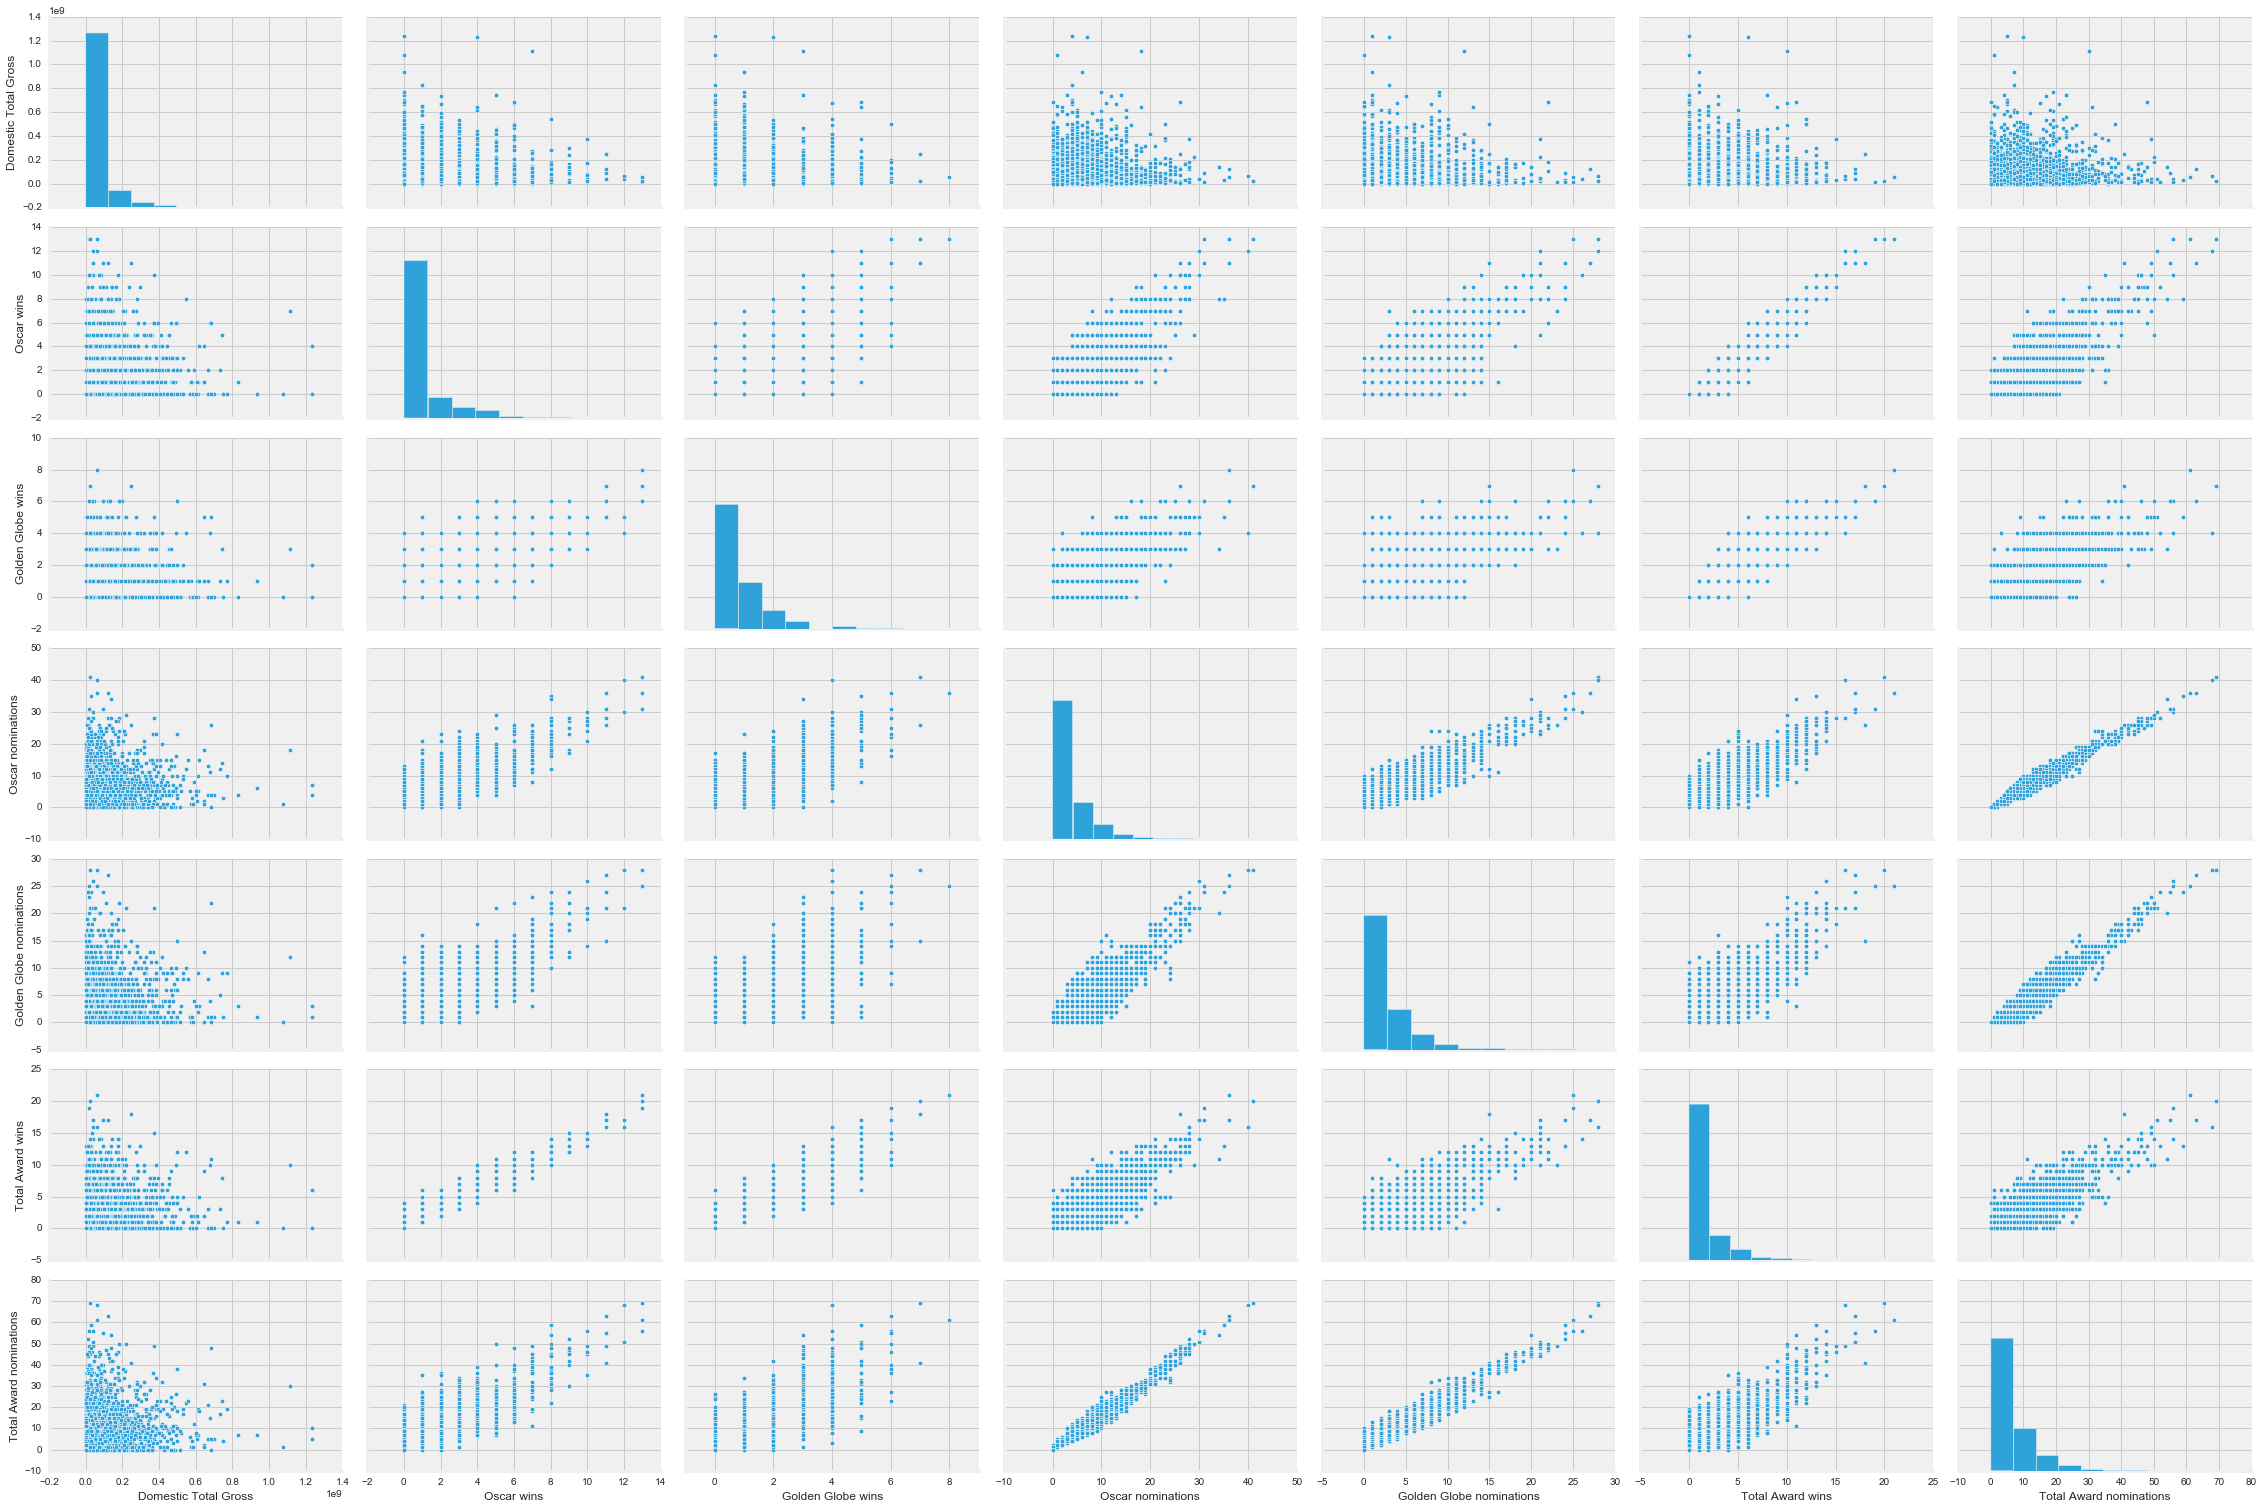

In [214]:
sns.pairplot(data_summed_final2, size = 3.0, aspect=1.5);

In [24]:
data_summed_final2.corr()

,Domestic Total Gross,Oscar wins,Golden Globe wins,Oscar nominations,Golden Globe nominations,Total Award wins,Total Award nominations
Domestic Total Gross,1.000000,0.202811,0.159132,0.224196,0.179923,0.196455,0.211279
Oscar wins,0.202811,1.000000,0.774322,0.795544,0.786156,0.964349,0.812343
Golden Globe wins,0.159132,0.774322,1.000000,0.756137,0.727069,0.914174,0.763561
Oscar nominations,0.224196,0.795544,0.756137,1.000000,0.896358,0.825785,0.982171
Golden Globe nominations,0.179923,0.786156,0.727069,0.896358,1.000000,0.807615,0.963718
Total Award wins,0.196455,0.964349,0.914174,0.825785,0.807615,1.000000,0.839649
Total Award nominations,0.211279,0.812343,0.763561,0.982171,0.963718,0.839649,1.000000


In [26]:
data_summed_final2.corr()['Y'].sort_values(ascending=False)

Y     1.000000
X3    0.224196
X6    0.211279
X1    0.202811
X5    0.196455
X4    0.179923
X2    0.159132
Name: Y, dtype: float64

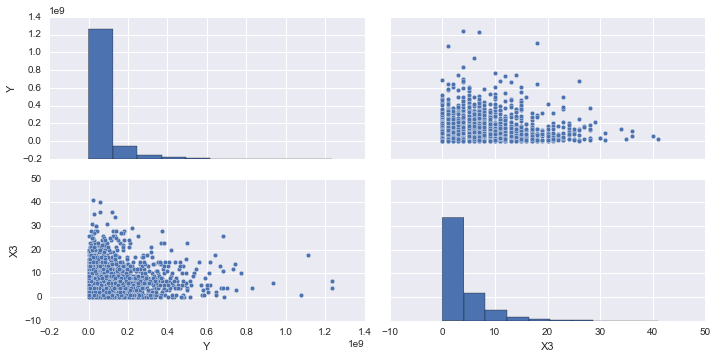

In [27]:
sns.pairplot(data_summed_final2[['Y','X3']], size = 2.5, aspect=2.0);


In [28]:
data_summed_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6326 entries, 0 to 6325
Data columns (total 7 columns):
Y     6326 non-null float64
X1    6326 non-null float64
X2    6326 non-null float64
X3    6326 non-null float64
X4    6326 non-null float64
X5    6326 non-null float64
X6    6326 non-null float64
dtypes: float64(7)
memory usage: 346.0 KB


In [29]:
data_summed_final2.columns = ['Y','X1','X2','X3','X4','X5','X6']
data_summed_final2
y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + (X3)**2 + X4', data=data_summed_final2, return_type="dataframe")
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     95.01
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           1.32e-78
Time:                        23:28:49   Log-Likelihood:            -1.2486e+05
No. Observations:                6326   AIC:                         2.497e+05
Df Residuals:                    6321   BIC:                         2.498e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    4.09e+07   1.47e+06     27.920      0.000       3.8e+07  4.38e+07
X1          7.426e+06   1.41e+06      5.262      0.000      4.66e+06  1.02e+07
X2         -5.381e+06   1.95e+06     -2.754      0.006     -9.21e+06 -1.55e+06
X3          5.927e+06   6.03e+05      9.834      0.000      4.75e+06  7.11e+06
X4         -3.931e+06   8.19e+05     -4.798      0.000     -5.54e+06 -2.33e+06
==============================================================================
Omnibus:                     5262.196   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180877.280
Skew:                           3.821   Prob(JB):                         0.00
Kurtosis:                      28.056   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Define the model
lm1 = smf.ols('Y ~ X1 + X2 + X3 + X4 + X5 + X6', data=data_summed_final2)
# Fit the model
fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     95.01
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           1.32e-78
Time:                        23:28:49   Log-Likelihood:            -1.2486e+05
No. Observations:                6326   AIC:                         2.497e+05
Df Residuals:                    6321   BIC:                         2.498e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    4.09e+07   1.47e+06     27.920      0.000       3.8e+07  4.38e+07
X1          6.744e+06   1.35e+06      5.009      0.000       4.1e+06  9.38e+06
X2         -6.063e+06   1.56e+06     -3.896      0.000     -9.11e+06 -3.01e+06
X3          5.262e+06   6.23e+05      8.451      0.000      4.04e+06  6.48e+06
X4         -4.596e+06      7e+05     -6.564      0.000     -5.97e+06 -3.22e+06
X5          6.817e+05   6.28e+05      1.086      0.277     -5.49e+05  1.91e+06
X6          6.651e+05   1.98e+05      3.362      0.001      2.77e+05  1.05e+06
==============================================================================
Omnibus:                     5262.196   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180877.280
Skew:                           3.821   Prob(JB):                         0.00
Kurtosis:                      28.056   Cond. No.                     3.20e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.57e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
# STUDENT SECTION
# Define the model removing X2, X4, and X5
# Define the model
lm2 = smf.ols('Y ~ X1 + X2 + I(X2**2)+ I(X3**2) + X3 + I(X4**2) + X4', data=data_summed_final2)
# Fit the model
fit2 = lm2.fit()
# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     64.05
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           1.66e-89
Time:                        23:53:09   Log-Likelihood:            -1.2482e+05
No. Observations:                6326   AIC:                         2.497e+05
Df Residuals:                    6318   BIC:                         2.497e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3.535e+07   1.66e+06     21.300      0.000      3.21e+07  3.86e+07
X1            9.2e+06   1.42e+06      6.457      0.000      6.41e+06   1.2e+07
X2         -1.597e+07   3.29e+06     -4.851      0.000     -2.24e+07 -9.51e+06
I(X2 ** 2)  3.018e+06   8.65e+05      3.489      0.000      1.32e+06  4.71e+06
I(X3 ** 2) -2.443e+05   5.61e+04     -4.358      0.000     -3.54e+05 -1.34e+05
X3          9.193e+06   9.89e+05      9.291      0.000      7.25e+06  1.11e+07
I(X4 ** 2) -3.117e+04   9.83e+04     -0.317      0.751     -2.24e+05  1.61e+05
X4           -2.5e+06   1.31e+06     -1.914      0.056     -5.06e+06  6.06e+04
==============================================================================
Omnibus:                     5263.510   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182869.379
Skew:                           3.818   Prob(JB):                         0.00
Kurtosis:                      28.209   Cond. No.                         332.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

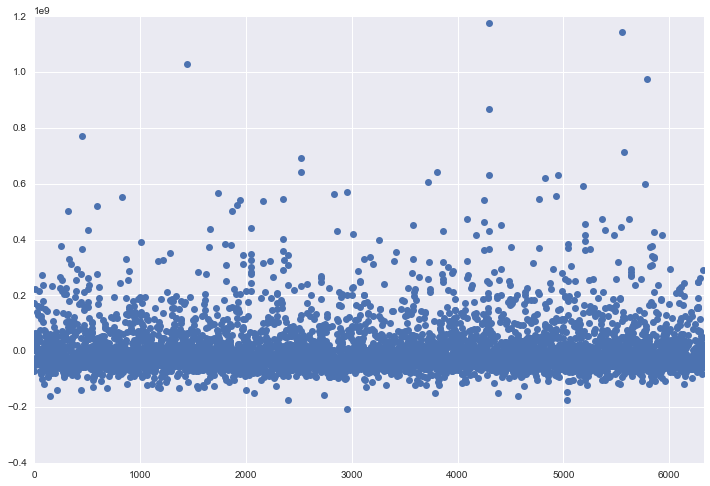

In [63]:
fit.resid.plot(style='o', figsize=(12,8));

In [33]:
# Create an empty model
lr = LinearRegression()
# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = data_summed_final2.iloc[:, 1:5]
# Choose the response variable(s)
y = data_summed_final2.iloc[:, 0]
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.05671111071431123

In [34]:
# STUDENT SECTION
# Create an empty model
lr = LinearRegression()
# Choose the predictor variables, here all but the first which is the response variable
X = data_summed_final2[['X1','X2','X3','X4']]
# Choose the response variable(s)
y = data_summed_final2['Y']
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.05671111071431123

In [35]:
lr.intercept_
# print out other coefficients
lr.coef_

array([ 7426033.72365987, -5380817.30116185,  5926636.07950828,
       -3931369.1761014 ])

In [36]:
lsm = smf.ols('Y ~ X1 + X2 + X3 + (X3)**2 + X4', data = data_summed_final2)
fit1 = lsm.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     95.01
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           1.32e-78
Time:                        23:28:55   Log-Likelihood:            -1.2486e+05
No. Observations:                6326   AIC:                         2.497e+05
Df Residuals:                    6321   BIC:                         2.498e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    4.09e+07   1.47e+06     27.920      0.0

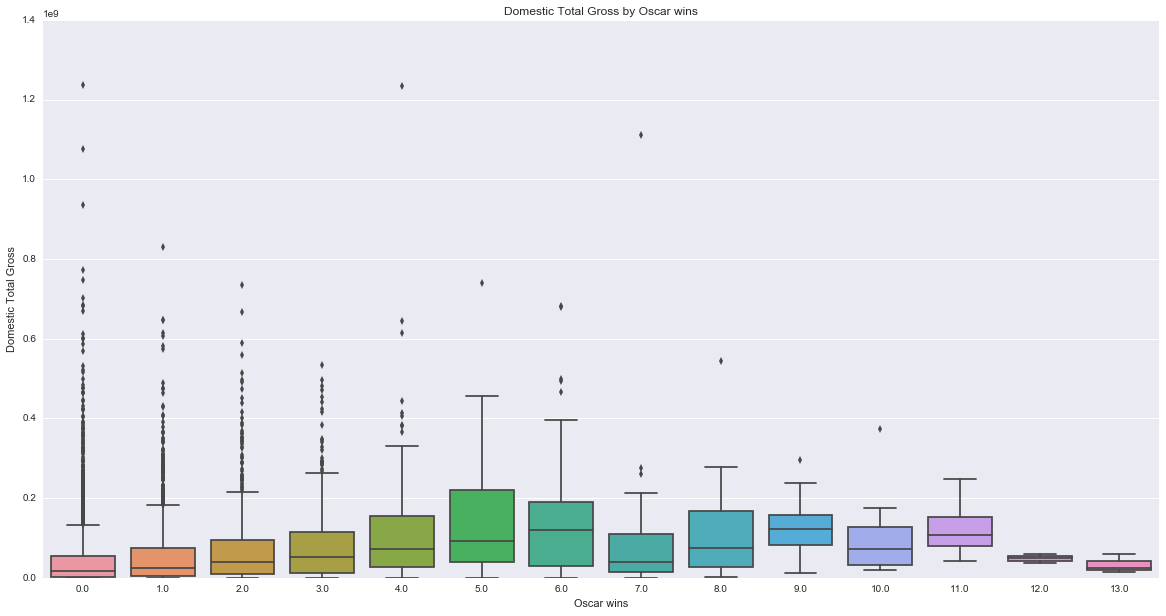

In [37]:

# Visualize some of the different variables against 'Domestic Total Gross'
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Domestic Total Gross by Oscar wins')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=data_summed_final2['X1'].sort_values(), y=data_summed_final2['Y'])
ax.set_xlabel('Oscar wins')
ax.set_ylabel('Domestic Total Gross')

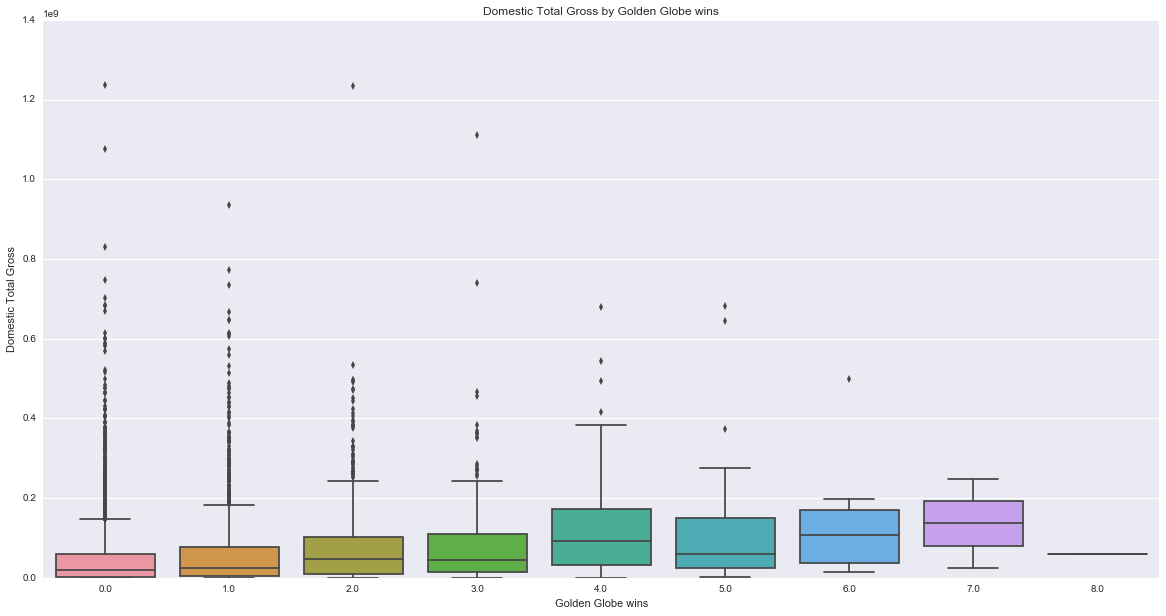

In [38]:
# Visualize some of the different variables against 'Domestic Total Gross'
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Domestic Total Gross by Golden Globe wins')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=data_summed_final2['X2'].sort_values(), y=data_summed_final2['Y'])
ax.set_xlabel('Golden Globe wins')
ax.set_ylabel('Domestic Total Gross')

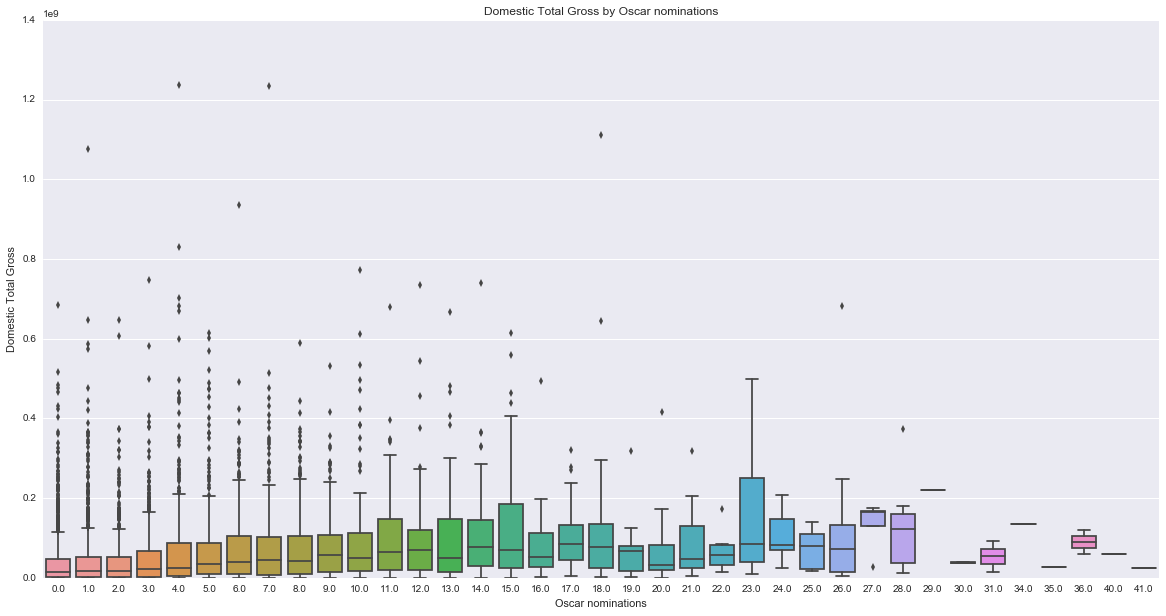

In [39]:
# Visualize some of the different variables against 'Domestic Total Gross'
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Domestic Total Gross by Oscar nominations')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=data_summed_final2['X3'].sort_values(), y=data_summed_final2['Y'])
ax.set_xlabel('Oscar nominations')
ax.set_ylabel('Domestic Total Gross')

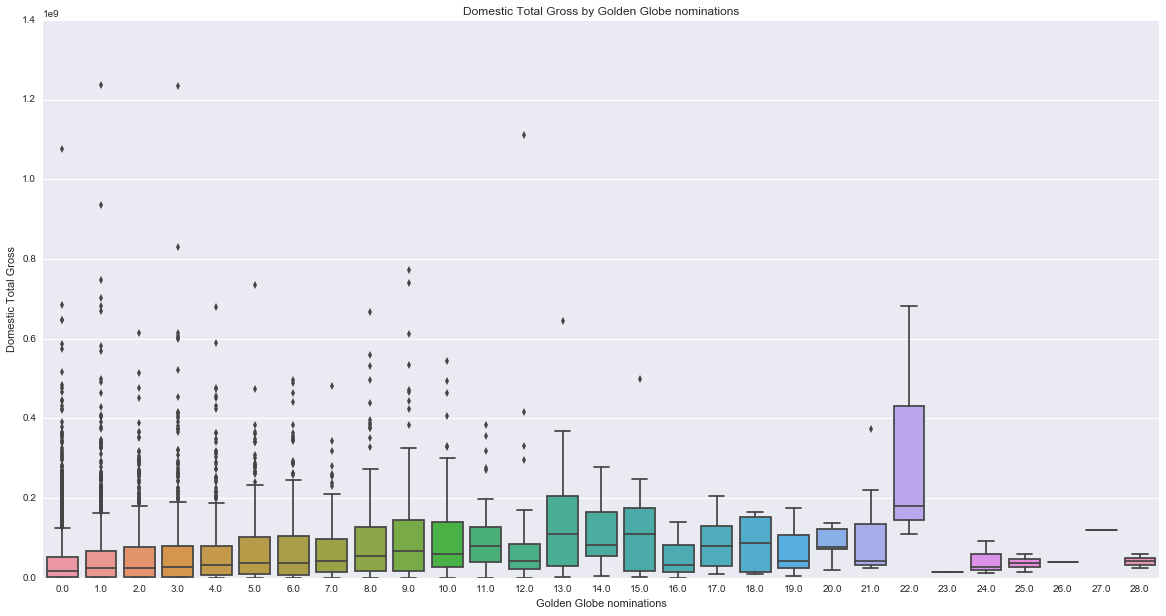

In [40]:
# Visualize some of the different variables against 'Domestic Total Gross'
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Domestic Total Gross by Golden Globe nominations')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=data_summed_final2['X4'].sort_values(), y=data_summed_final2['Y'])
ax.set_xlabel('Golden Globe nominations')
ax.set_ylabel('Domestic Total Gross')

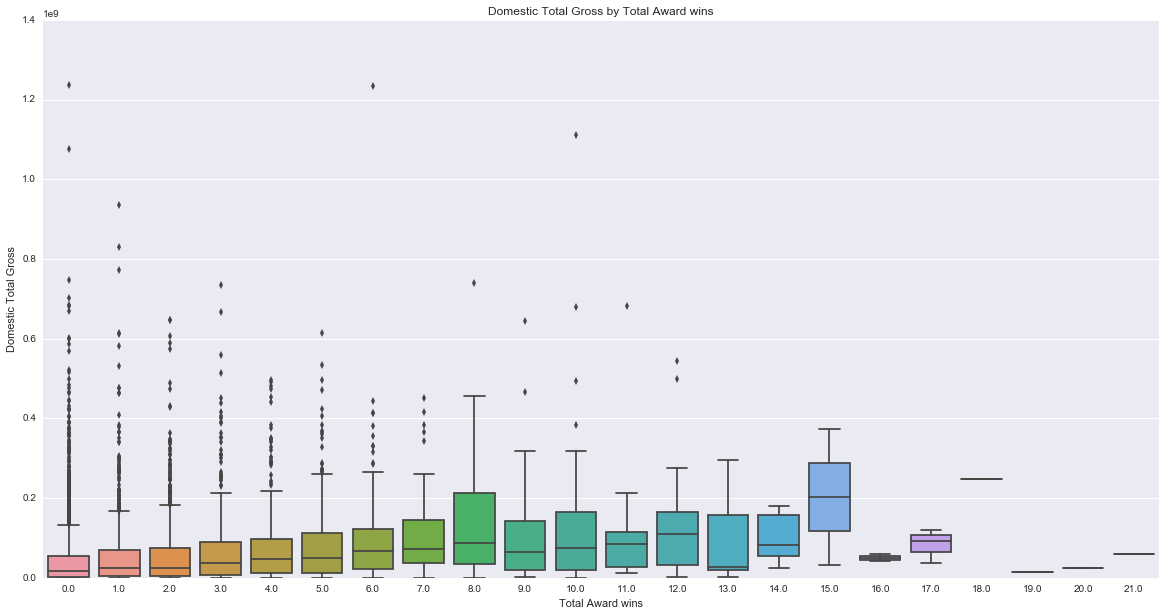

In [41]:
# Visualize some of the different variables against 'Domestic Total Gross'
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Domestic Total Gross by Total Award wins')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=data_summed_final2['X5'].sort_values(), y=data_summed_final2['Y'])
ax.set_xlabel('Total Award wins')
ax.set_ylabel('Domestic Total Gross')

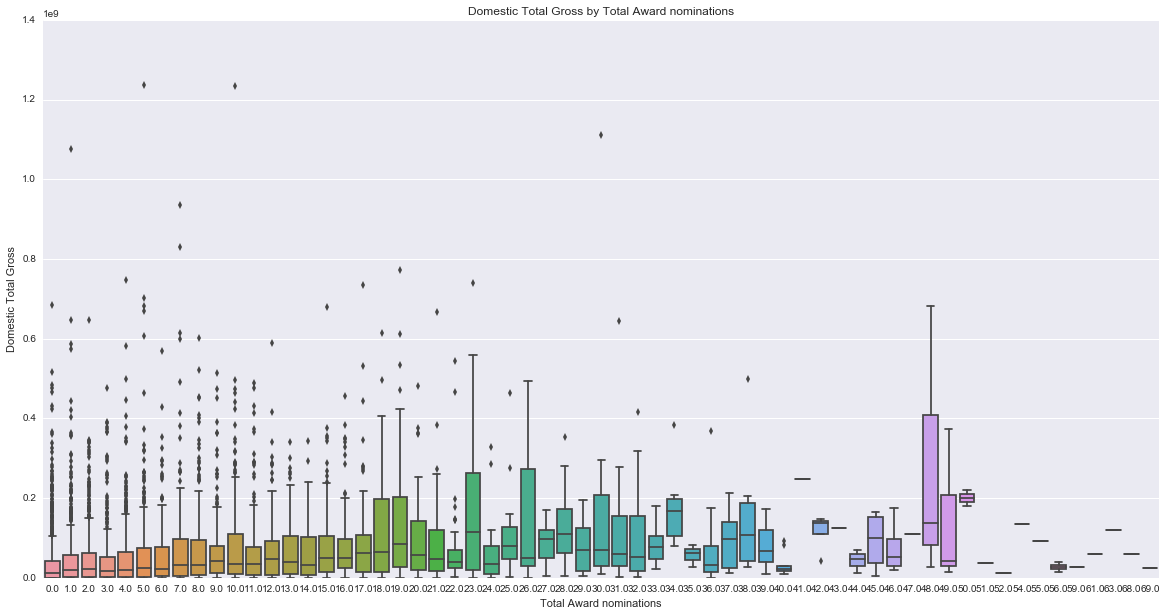

In [42]:
# Visualize some of the different variables against 'Domestic Total Gross'
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Domestic Total Gross by Total Award nominations')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=data_summed_final2['X6'].sort_values(), y=data_summed_final2['Y'])
ax.set_xlabel('Total Award nominations')
ax.set_ylabel('Domestic Total Gross')

In [43]:

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [44]:
# STUDENT SECTION
lr = LinearRegression()

X = data_summed_final2[['X1','X2','X3','X4']]

y = data_summed_final2['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.052869775539215347

In [46]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(cv=10)
rcv.fit(X_train, y_train)
rcv.score(X_test, y_test)

0.052889080472901639

In [47]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.052869775539215347

In [48]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(cv=10)

In [69]:
from sklearn.ensemble import RandomForestRegressor
X = data_summed_final2[['X1','X2', 'X3','X4']]
y = data_summed_final2['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestRegressor()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

-0.12688351208830251

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X = data_summed_final2[['X1','X2','X3','X4']]
Y = data_summed_final2['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
est = GradientBoostingRegressor(learning_rate=0.1,
     max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
mean_squared_error(Y_test, est.predict(X_test)) 

ValueError: Found input variables with inconsistent numbers of samples: [4428, 5060]